In [1]:
import tensorflow
from tensorflow import keras

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [16]:
import pandas as pd

df = pd.read_csv('/content/fashion-mnist_test.csv',encoding= 'unicode_escape')

In [18]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103.0,87.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0,0,0,0,0,14,53,99,...,0.0,0.0,0.0,0.0,63.0,53.0,31.0,0.0,0.0,0.0
3,2,0,0,0,0,0,0,0,0,0,...,137.0,126.0,140.0,0.0,133.0,224.0,222.0,56.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


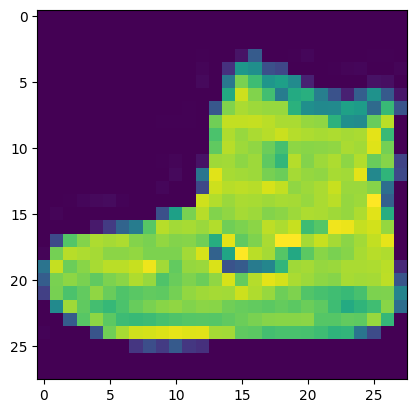

In [17]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [5]:
x_train=x_train/255
x_test=x_test/255

In [6]:
from keras.models import Sequential
from keras.layers import Flatten,Dense

In [7]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
history=model.fit(x_train,y_train,epochs=20,batch_size=64,verbose=1,validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 0.5400 - accuracy: 0.8143 - val_loss: 0.4636 - val_accuracy: 0.8327
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3991 - accuracy: 0.8582 - val_loss: 0.3935 - val_accuracy: 0.8615
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3596 - accuracy: 0.8728 - val_loss: 0.3976 - val_accuracy: 0.8593
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3335 - accuracy: 0.8790 - val_loss: 0.3513 - val_accuracy: 0.8732
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3137 - accuracy: 0.8851 - val_loss: 0.3385 - val_accuracy: 0.8784
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2962 - accuracy: 0.8902 - val_loss: 0.3280 - val_accuracy: 0.8817
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2873 - accuracy: 0.8946 - val_loss: 0.3288 - val_accuracy: 0.8822
Epoch 

In [10]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3798 - accuracy: 0.8805


[0.37983715534210205, 0.8805000185966492]

In [11]:
model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


array([[6.76352707e-09, 1.37670664e-09, 2.66941380e-09, ...,
        2.38744598e-02, 1.16829014e-07, 9.76051390e-01],
       [1.06970674e-05, 2.42740923e-14, 9.99884069e-01, ...,
        9.88675219e-18, 6.06193264e-12, 2.32495380e-20],
       [2.33177495e-08, 9.99999940e-01, 5.87460844e-11, ...,
        1.68713706e-15, 1.12347597e-13, 7.71289931e-19],
       ...,
       [3.73714170e-06, 4.95441904e-13, 2.07556036e-06, ...,
        3.71982516e-08, 9.99982893e-01, 2.10982101e-15],
       [2.39554474e-08, 9.99976575e-01, 1.98916750e-09, ...,
        2.19149308e-12, 3.08432668e-10, 1.47988177e-10],
       [1.17870293e-07, 2.16051639e-08, 7.33951651e-07, ...,
        5.45289833e-04, 1.19422475e-05, 1.33812330e-06]], dtype=float32)

In [12]:
import numpy as np
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 0s 1ms/step


In [13]:
print(predictions)

[9 2 1 ... 8 1 5]
